In [1]:
# this line will run conda from the commandline to install NLTK
# '!conda install nltk'

In [2]:
import nltk

In [4]:
nltk.download()
# this downloads a bunch of models, could be quite space consuming

# for this exercise, we only need 'Stopwords'

# tricky to exit this download function, it pops up a window
# be prepared to restart kernel if necessary here

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


SystemExit: 0

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [3]:
# download messages data from here:
# https://archive.ics.uci.edu/ml/machine-learning-databases/00228/  

In [5]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]

In [6]:
print(len(messages))
# observation - confirm we collected 5574 'spam' or 'ham' messages

5574


In [7]:
# print the first 10 lines to glimpse at the messages var
# notice, enumerate will return a tuple - (index,data)

for num, msg in enumerate(messages[:10]):
    print(num,msg,'\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... 

1 ham	Ok lar... Joking wif u oni... 

2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's 

3 ham	U dun say so early hor... U c already then say... 

4 ham	Nah I don't think he goes to usf, he lives around here though 

5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv 

6 ham	Even my brother is not like to speak with me. They treat me like aids patent. 

7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune 

8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [8]:
# we'll use pandas to work with the messages file
import pandas

In [23]:
# recall sep defines the separator, ni this case for tab-delimited file
# recall labels will define the labels in the resulting DataFrame
messages = pandas.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=['labels','message'])

In [24]:
# nice and clean DataFrame
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
# lets look at some stats and understand our data better
messages.describe()

# observation - 4825 out of 5572 datapoints are 'ham'
# observation - confirm there are only 2 label types (spam and ham), useful for data verification

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [20]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
labels     5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


In [26]:
# continue increasing your domain knowledge of the data
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [27]:
# what are the lengths of the messages?
messages['length'] = messages['message'].apply(len)

In [28]:
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# lets visualize some of this
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

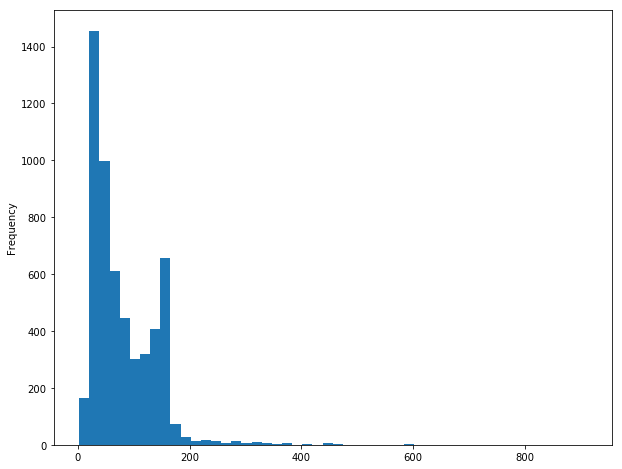

In [33]:
# what's the distribution of lengths?
messages['length'].plot(bins=50,kind='hist',figsize=(10,8))

# observation - why does my plot X-axis go all the way to 1000?  lets 'describe' the 'length' column

In [34]:
messages['length'].describe()
# observation - whoa, there's a 910 length message?  

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [35]:
# lets see those very long messages
messages[messages['length'] > 500]

,labels,message,length
1085,ham,For me the love should start with attraction.i...,910
1579,ham,How to Make a girl Happy? It's not at all diff...,611
1863,ham,The last thing i ever wanted to do was hurt yo...,790
2158,ham,Sad story of a Man - Last week was my b'day. M...,588
2434,ham,Indians r poor but India is not a poor country...,629
2849,ham,Sad story of a Man - Last week was my b'day. M...,588


In [42]:
# lets see a full message
messages[messages['length'] > 500]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11e6796d8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11e7e7048>], dtype=object)

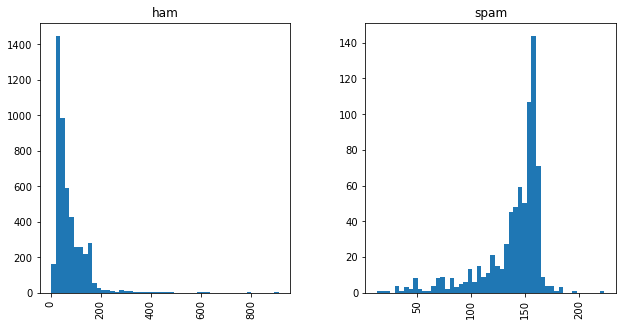

In [43]:
# is message length important for ham -vs- spam?
# lets plot a histogram
messages.hist(column='length', by='labels', bins=50, figsize=(10,5))

In [65]:
# lets splice out a dataframe and exclude the messages over 400 for better graphing
holder = messages[messages['length'] < 400]
holder.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


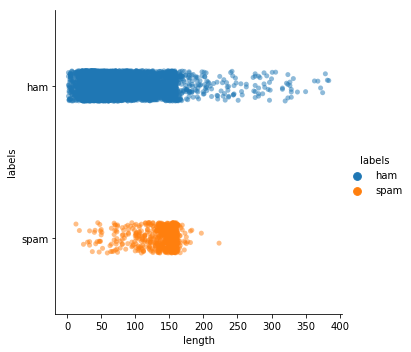

In [66]:
# is message length important for ham -vs- spam?
# lets plot a histogram

# sns.catplot('length','labels',data=messages, hue='labels', alpha=0.5)

sns.catplot('length','labels',data=holder, hue='labels', alpha=0.5)

# observation --> high concentration of spam messages of length 150 +/- 25 roughly

In [67]:
# now we'll start pre-processing the messages (bag of words, etc)

In [68]:
import string

In [69]:
# test string to remove punctuation
mess = 'Sample message! Notice: it has punctuation'

In [70]:
# string helps us strip punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [71]:
# strip out punctuations, but results in array
no_punc = [char for char in mess if char not in string.punctuation]
no_punc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [72]:
# now reconstruct as a string sentence
no_punc = ''.join(no_punc)
no_punc

'Sample message Notice it has punctuation'

In [73]:
# recall we downloaded the stopwords corpus earlier with nltk.download()
from nltk.corpus import stopwords

In [74]:
# what does this object look like?
stopwords.words('english')[:10]

# observation - we want to remove these words because they don't give us much value
# when we are evaluating sentences

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [76]:
# removing stopwords, little evaluation value
clean_mess = [word for word in no_punc.split() if word.lower() not in stopwords.words('english')]
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [79]:
def text_process(mess):
    """
    Takes a string of test and does the following:
    1 - remove all punctuation
    2 - remove all stop-words
    3 - returns a list of cleaned text
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [83]:
# we will not do 'stemming' or 'part of speech'
# check out the jpytr notebook for more details, NLTK has more features for this

In [80]:
# we will now tokenize the messages
# count word frequency, weigh count, normalize vectors
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [84]:
from sklearn.feature_extraction.text import CountVectorizer

In [85]:
#create bag of words
bow = CountVectorizer(analyzer=text_process)
bow.fit(messages['message'])

# observation - this runs for a while depending on system performance and data size

CountVectorizer(analyzer=<function text_process at 0x11fc23a60>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)

In [87]:
# lets verify our output with a sinlge example
message4 = messages['message'][3]
message4

'U dun say so early hor... U c already then say...'

In [89]:
bow4 = bow.transform([message4])
print(bow4)
# which words occurred twice?  can check using 'get_feature_names'

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [90]:
print(bow.get_feature_names()[4068])

U


In [91]:
print(bow.get_feature_names()[9554])

say


In [92]:
# this time, let's use the entire message dataset
messages_bow = bow.transform(messages['message'])

# again, this will take a while, >15 seconds depending on system performance and dataset

In [96]:
# what do we end up with?
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurrences: ', messages_bow.nnz)
print('Sparcity: ', round((100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])),3),'%')


Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurrences:  50548
Sparcity:  0.079 %


In [97]:
# now let's implement the model
from sklearn.feature_extraction.text import TfidfTransformer

In [98]:
tfidf_trans = TfidfTransformer().fit(messages_bow)

In [101]:
# lets test on 1 message for now
tfidf4 = tfidf_trans.transform(bow4)
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [102]:
# now the entire messages set
messages_tfidf = tfidf_trans.transform(messages_bow)

In [103]:
messages_tfidf.shape

(5572, 11425)

In [104]:
type(messages_tfidf)

scipy.sparse.csr.csr_matrix

In [107]:
# implementation of Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

In [108]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['labels'])

In [109]:
type(spam_detect_model)

sklearn.naive_bayes.MultinomialNB

In [111]:
# lets check predict -vs- expect on our selected test message
print('Predicted: ', spam_detect_model.predict(tfidf4)[0])
print('Expected: ', messages['labels'][3])

Predicted:  ham
Expected:  ham


In [112]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [113]:
# we can generate a classification report using sklearn's conveniently named 'classification_report'
from sklearn.metrics import classification_report

In [114]:
print(classification_report(messages['labels'],all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [115]:
# lets split our data into train/test sets
from sklearn.cross_validation import train_test_split

/Users/dorkyegg/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [117]:
msg_train,msg_test,label_train,label_test = train_test_split(messages['message'],messages['labels'],test_size=0.2)
print('msg_train=',len(msg_train))
print('msg_test=',len(msg_test))
print('label_train=',len(label_train))
print('label_test=',len(label_test))

msg_train= 4457
msg_test= 1115
label_train= 4457
label_test= 1115


In [118]:
# we can use sklearn's pipeline for pre-processing and transformations
from sklearn.pipeline import Pipeline

In [119]:
# we will now pass a list of tuples

# INCREDIBLY powerful for streamlining

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [120]:
pipeline.fit(msg_train,label_train)
# observation - will take a while to fit, remember based on data size and system performance

Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x11fc23a60>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [121]:
predictions = pipeline.predict(msg_test)

In [122]:
print(classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.95      0.97      1002
       spam       0.70      1.00      0.82       113

avg / total       0.97      0.96      0.96      1115

